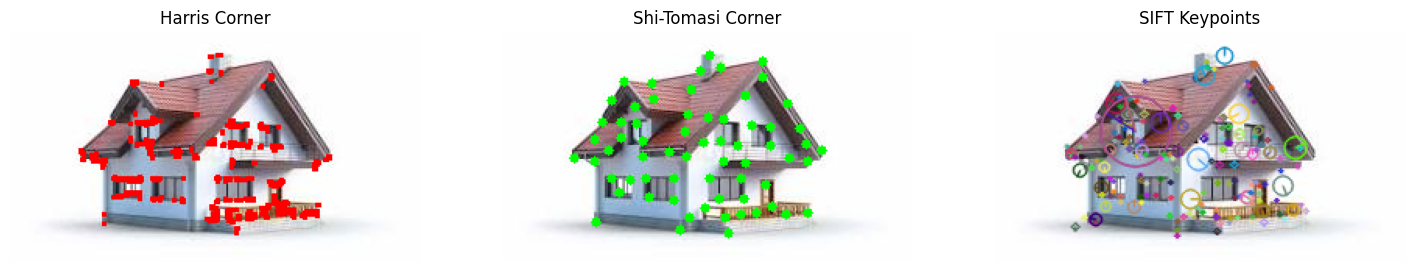

Harris Detector: 2090 points, Time: 0.0020s
Shi-Tomasi Detector: 65 points, Time: 0.0000s
SIFT Detector: 196 keypoints, Time: 0.0141s


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Load image
img = cv2.imread('image3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === 1. Harris Corner Detector ===
start = time.time()
harris = cv2.cornerHarris(np.float32(gray), blockSize=2, ksize=3, k=0.04)
harris = cv2.dilate(harris, None)
harris_img = img.copy()
harris_img[harris > 0.01 * harris.max()] = [0, 0, 255]  # Mark corners in red
harris_time = time.time() - start

# === 2. Shi-Tomasi Corner Detector ===
start = time.time()
shi_corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
shi_img = img.copy()
if shi_corners is not None:
    for c in shi_corners:
        x, y = c.ravel()
        cv2.circle(shi_img, (int(x), int(y)), 3, (0, 255, 0), -1)  # Green
shi_time = time.time() - start

# === 3. SIFT Detector ===
start = time.time()
sift = cv2.SIFT_create()
keypoints = sift.detect(gray, None)
sift_img = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
sift_time = time.time() - start

# === Display the results ===
titles = ['Harris Corner', 'Shi-Tomasi Corner', 'SIFT Keypoints']
images = [harris_img, shi_img, sift_img]

plt.figure(figsize=(18, 6))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(f"{titles[i]}")
    plt.axis('off')
plt.show()

# === Print Performance Metrics ===
print(f"Harris Detector: {np.sum(harris > 0.01 * harris.max())} points, Time: {harris_time:.4f}s")
print(f"Shi-Tomasi Detector: {len(shi_corners)} points, Time: {shi_time:.4f}s")
print(f"SIFT Detector: {len(keypoints)} keypoints, Time: {sift_time:.4f}s")


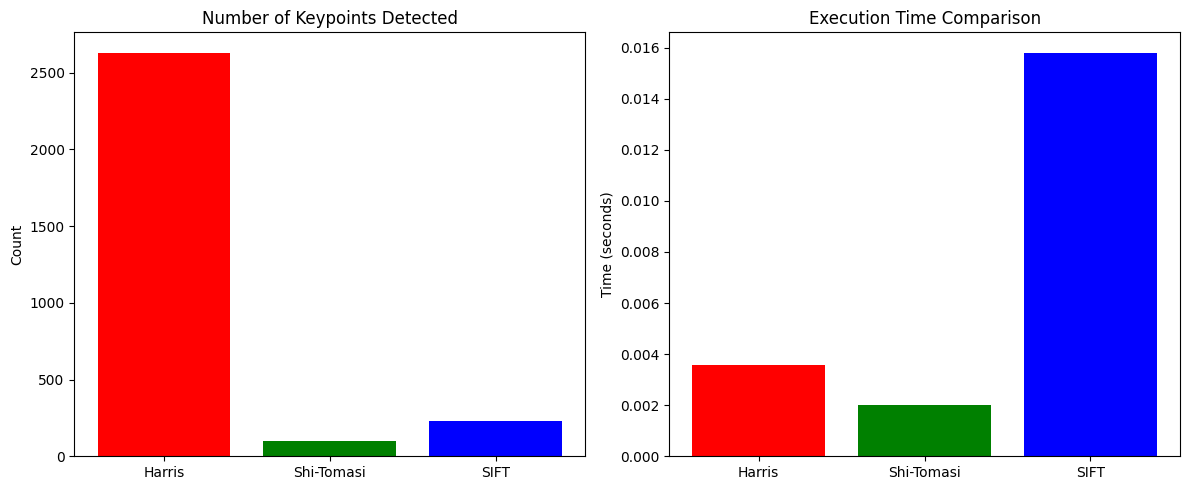

Harris: 2632 points, Time: 0.0036 sec
Shi-Tomasi: 100 points, Time: 0.0020 sec
SIFT: 231 points, Time: 0.0158 sec


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Load Image
img = cv2.imread('image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === 1. Harris Corner Detector ===
start = time.time()
harris = cv2.cornerHarris(np.float32(gray), blockSize=2, ksize=3, k=0.04)
harris = cv2.dilate(harris, None)
harris_points = np.sum(harris > 0.01 * harris.max())  # Approximate point count
harris_time = time.time() - start

# === 2. Shi-Tomasi Corner Detector ===
start = time.time()
shi_corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
shi_points = len(shi_corners) if shi_corners is not None else 0
shi_time = time.time() - start

# === 3. SIFT Detector ===
start = time.time()
sift = cv2.SIFT_create()
keypoints = sift.detect(gray, None)
sift_points = len(keypoints)
sift_time = time.time() - start

# === Data for Chart ===
detectors = ['Harris', 'Shi-Tomasi', 'SIFT']
keypoints_count = [harris_points, shi_points, sift_points]
execution_time = [harris_time, shi_time, sift_time]

# === Plot Keypoints Detected ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(detectors, keypoints_count, color=['red', 'green', 'blue'])
plt.title('Number of Keypoints Detected')
plt.ylabel('Count')

# === Plot Execution Time ===
plt.subplot(1, 2, 2)
plt.bar(detectors, execution_time, color=['red', 'green', 'blue'])
plt.title('Execution Time Comparison')
plt.ylabel('Time (seconds)')

plt.tight_layout()
plt.show()

# === Print for clarity ===
print(f"Harris: {harris_points} points, Time: {harris_time:.4f} sec")
print(f"Shi-Tomasi: {shi_points} points, Time: {shi_time:.4f} sec")
print(f"SIFT: {sift_points} points, Time: {sift_time:.4f} sec")
